In [1]:
# This file takes the processed raw data from the Broad Institute.
# It applies the StandardScalar
# It performs PCA
# It applies a RandomForest model to predict cancer disease.

In [3]:
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
F='depmap/Model_CRISPRGeneEffect.csv.gz'
# continous score that is normalized between positive and negative controls. -1 is pan essential, 0 no effect
# continous dynamic range.

df=pd.read_csv(F, low_memory=False)
target_index=7
feature_start=38

# Select columns from the tenth column onward
subset_df = df.iloc[:, feature_start:]
subset_df.fillna(0, inplace=True)

In [7]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)

# Perform PCA
pca = PCA(n_components=100)
principal_components = pca.fit_transform(scaled_data)
#principal_components = pca.fit_transform(subset_df)

print(f'{pca}')

PCA(n_components=100)


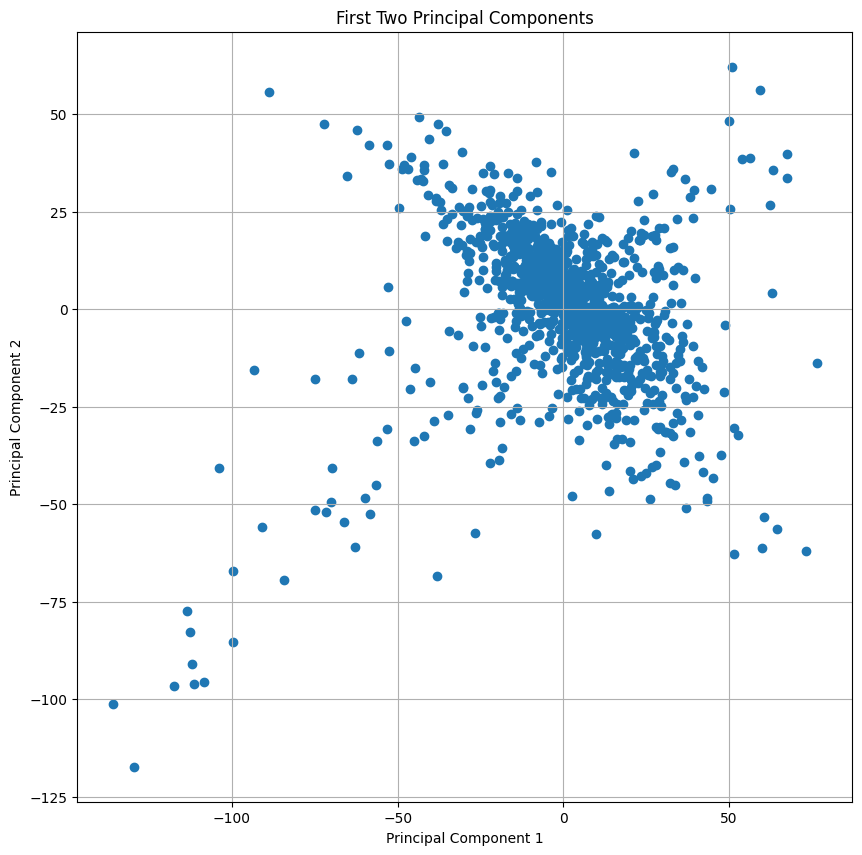

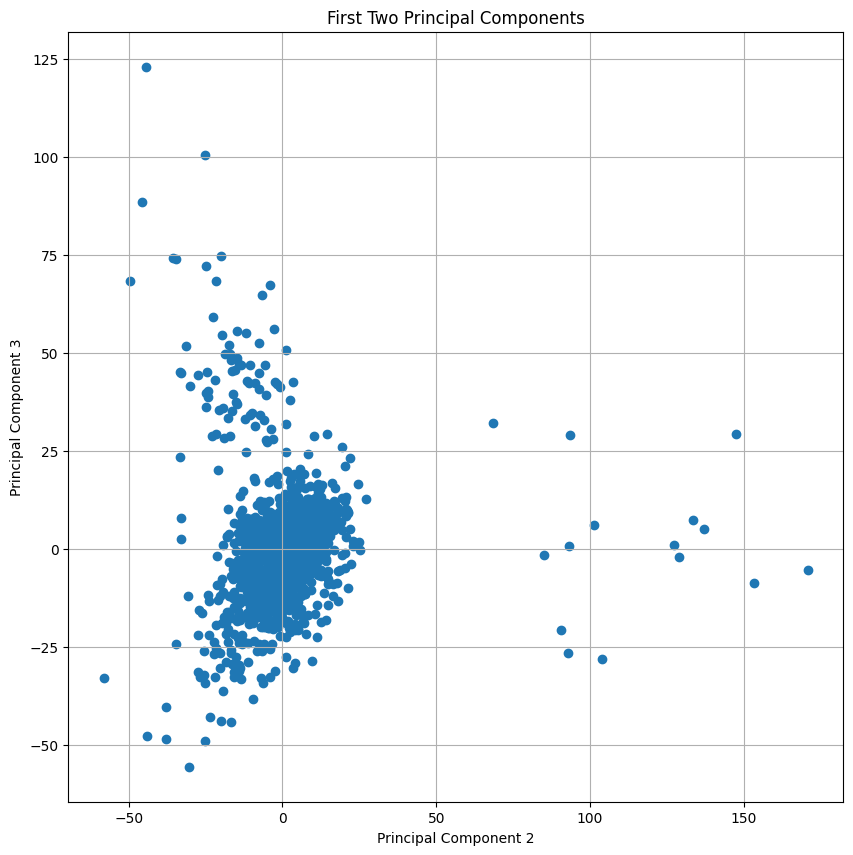

In [8]:
# Create a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components)

# Plot the first two prinipal components
plt.figure(figsize=(10, 10))
plt.scatter(pc_df.iloc[:,0], pc_df.iloc[:,1])
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.scatter(pc_df.iloc[:,3], pc_df.iloc[:,4])
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.grid(True)
plt.show()

In [9]:
# Split features and target
X = df.iloc[:, feature_start:]  # Features (assuming the first two columns are features)
y = df.iloc[:, target_index]    # Target (assuming column 2 is the target column)

X.fillna(0, inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# original_values = label_encoder.inverse_transform(encoded_labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [45]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
# Predict on the validation set
test_predictions = rf_classifier.predict(X_test)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_test, test_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.4409090909090909


In [47]:
print(f'Train Size: {X_train.shape}\tTest Size: {X_test.shape}')

Train Size: (880, 18443)	Test Size: (220, 18443)


In [51]:
print(pc_df)
scaler = StandardScaler()
pc_df_scaled = scaler.fit_transform(pc_df)
print(pc_df_scaled)

             0          1          2         3          4          5   \
0     45.191285  33.829497   0.585580 -2.654872   3.995395   6.771803   
1      5.291065   0.071738  -1.986024  0.448705  -1.472671   2.859523   
2     48.020512 -36.836383   8.300308 -4.086996   9.454464  -1.268352   
3    -27.474369  20.732588   0.915390 -1.426113  16.617501  18.267511   
4     -4.914435  -0.005076   4.758153 -2.131241 -15.610046   6.596959   
...         ...        ...        ...       ...        ...        ...   
1095  -3.363718   3.240036  -6.007174 -2.880272   5.926865 -46.198073   
1096  -4.995043   7.617257  -9.325699  2.691107   1.808716 -32.646285   
1097  -8.156030   1.369007 -17.443348  8.267237   1.374295 -12.622787   
1098 -16.135190   3.182906 -12.973902  4.224255   2.397906 -28.340622   
1099  -6.203153  -0.818930 -14.183297  5.696709  -0.825347 -16.197427   

             6          7          8          9   ...         90        91  \
0     17.272833  23.289705  19.187816  15.444

In [52]:
# Split the data into train and test sets
# pc_df_scaled represents standard scaler normalization on 
X_train, X_test, y_train, y_test = train_test_split(pc_df_scaled, y_encoded, test_size=0.2, random_state=42)

In [53]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Predict on the validation set
test_predictions = rf_classifier.predict(X_test)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_test, test_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.43636363636363634


In [56]:
test_predictions, y_test

(array([51, 12, 51, 12, 39, 51, 12, 54, 12, 39, 14, 12, 54, 37, 51, 51, 26,
        54, 54, 56, 37, 51, 51, 51, 51, 26, 54, 26, 37, 37, 39, 51, 51, 14,
        39, 60, 39, 51, 51, 26, 12, 36, 14, 12, 32, 26, 51, 12, 20, 51, 14,
        26, 14, 12, 26, 33, 51, 39, 19, 12, 47, 51, 54, 51, 51, 12, 14, 54,
        26, 39, 51, 51, 51, 51, 37, 39, 37, 14, 18, 37, 14, 14, 39, 54, 36,
        51, 37, 39, 51, 47, 62, 26, 51, 14, 19, 51, 39, 26, 56, 12, 39, 47,
        39, 51, 26, 14, 14, 26, 12, 20, 51, 54, 51, 26, 51, 14, 14, 26, 51,
        56, 47, 14, 12, 26, 51, 56, 37, 51, 47, 14,  0, 19, 26, 39, 37, 60,
        60, 14, 14, 12, 54, 37, 51, 51, 51, 54, 39, 37, 26, 51, 47,  4, 14,
        54, 51, 14, 39, 39, 51, 51, 51, 14, 12, 20, 26, 12, 51, 26, 56, 51,
        51, 51, 33, 12, 26, 36, 37, 51, 39, 51, 37, 54, 37, 39, 12,  0, 51,
        26, 12,  4, 39, 37, 26, 26, 51, 54, 56, 56, 51, 51, 26, 14, 26, 51,
         0, 51, 26, 51, 51, 39, 51, 12, 36, 54, 37, 54, 51, 14, 37, 14]),
 array([54, 63

In [77]:
d = {}
c = {}

for n in range(0,len(test_predictions)):
    if test_predictions[n] == y_test[n]:
        score = 0
    else:
        score = 1

    if y_test[n] in d:
        d[y_test[n]] = d[y_test[n]] + score
        c[y_test[n]] = c[y_test[n]] + 1
    else:
        d[y_test[n]] = score
        c[y_test[n]] = 1
    
        
print (d)
sorted_dict = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict)


{54: 4, 63: 3, 37: 4, 12: 3, 39: 2, 33: 9, 47: 5, 3: 1, 46: 1, 56: 6, 19: 6, 28: 5, 26: 0, 51: 4, 66: 1, 32: 6, 57: 4, 49: 1, 52: 1, 14: 3, 60: 3, 36: 3, 10: 5, 2: 1, 18: 5, 15: 3, 13: 4, 16: 2, 23: 1, 38: 1, 30: 1, 6: 4, 62: 1, 35: 2, 59: 1, 20: 4, 55: 1, 41: 2, 69: 1, 0: 1, 4: 3, 7: 1, 9: 1, 45: 1, 48: 1, 31: 1, 34: 1}
{33: 9, 56: 6, 19: 6, 32: 6, 47: 5, 28: 5, 10: 5, 18: 5, 54: 4, 37: 4, 51: 4, 57: 4, 13: 4, 6: 4, 20: 4, 63: 3, 12: 3, 14: 3, 60: 3, 36: 3, 15: 3, 4: 3, 39: 2, 16: 2, 35: 2, 41: 2, 3: 1, 46: 1, 66: 1, 49: 1, 52: 1, 2: 1, 23: 1, 38: 1, 30: 1, 62: 1, 59: 1, 55: 1, 69: 1, 0: 1, 7: 1, 9: 1, 45: 1, 48: 1, 31: 1, 34: 1, 26: 0}


In [93]:
print("label\tname\tcount\twrong\tfraction_incorrect")
for k in sorted_dict:
    perc = sorted_dict[k]/c[k]
    print(f'{k}\t{label_encoder.inverse_transform([k])}\t{c[k]}\t{sorted_dict[k]}\t{round(perc*100, 2)}%')

label	name	count	wrong	fraction_incorrect
33	['Invasive Breast Carcinoma']	11	9	81.82%
56	['Pancreatic Adenocarcinoma']	10	6	60.0%
19	['Esophagogastric Adenocarcinoma']	7	6	85.71%
32	['Intraductal Papillary Neoplasm of the Bile Duct']	6	6	100.0%
47	['Neuroblastoma']	9	5	55.56%
28	['Hepatocellular Carcinoma']	5	5	100.0%
10	['Cervical Squamous Cell Carcinoma']	5	5	100.0%
18	['Esophageal Squamous Cell Carcinoma']	5	5	100.0%
54	['Ovarian Epithelial Tumor']	9	4	44.44%
37	['Mature B-Cell Neoplasms']	18	4	22.22%
51	['Non-Small Cell Lung Cancer']	21	4	19.05%
57	['Pleural Mesothelioma']	4	4	100.0%
13	['Cutaneous Squamous Cell Carcinoma']	4	4	100.0%
6	['Bladder Urothelial Carcinoma']	4	4	100.0%
20	['Ewing Sarcoma']	6	4	66.67%
63	['Rhabdomyosarcoma']	3	3	100.0%
12	['Colorectal Adenocarcinoma']	10	3	30.0%
14	['Diffuse Glioma']	12	3	25.0%
60	['Renal Cell Carcinoma']	4	3	75.0%
36	['Lung Neuroendocrine Tumor']	5	3	60.0%
15	['Embryonal Tumor']	3	3	100.0%
4	['B-Lymphoblastic Leukemia/Lymphoma']	5	3	60.

In [80]:
original_values = label_encoder.inverse_transform([23])
original_values

array(['Gestational Trophoblastic Disease'], dtype=object)